<a href="https://colab.research.google.com/github/goswamiaman172/Customer-Segmentation/blob/main/Team_Customer_Segmentation_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation - Capstone Project. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Step:1 Importing Libraries and Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('/content/drive/MyDrive/Almabetter DataScience/Capstone4/Part 1/data/Copy of Online Retail.xlsx')
df.head(1)

print('\nOriginal Data (Rows,Columns) =' ,df.shape)

print('\n\nCheck for null Values :\n',df.isnull().sum())


Original Data (Rows,Columns) = (541909, 8)


Check for null Values :
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,Difference
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days


In [ ]:
#Statistical Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#description
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [ ]:
#COnverting into Positive Values
df['Quantity'] = df['Quantity'].abs()
df['UnitPrice'] = df['UnitPrice'].abs()
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.340487,NaN,4.692766,15287.690570,NaN
std,NaN,NaN,NaN,217.995482,NaN,96.755927,1713.600303,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


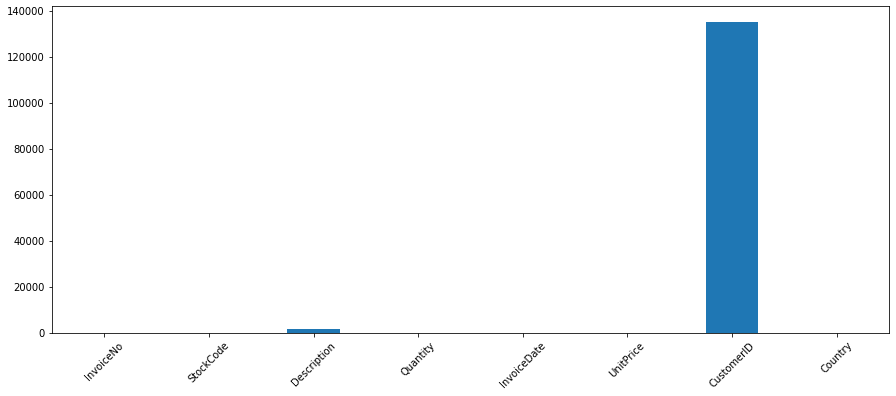

In [ ]:
#Null values in each column
plt.figure(figsize=(15,6))
df.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Lets fill Discription Values with zeros and Drop Other Values.

df['Description'].fillna(0, inplace=True)
df=df.dropna()
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
#Check for Duplication
df.duplicated().sum()

5225

Since same customers are buying the products again and again we cant remove the duplicated values instead of that we can count the frequency

In [ ]:
#Shape of data After Cleaning
df.shape

(406829, 8)

## **Step:2 PreProcessing the data**

Prepare separate columns

In [ ]:
df['Cost']=df['Quantity']*df['UnitPrice']

df1=df.groupby(['CustomerID'])['Cost'].sum().to_frame('TotalSum').reset_index()

df1.head(5)

,CustomerID,TotalSum
0,12346.0,154367.20
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
df['Difference']=df['InvoiceDate'].max()-df['InvoiceDate']

df2=df.groupby(['CustomerID'])['Difference'].min().to_frame('Purchase_Gap').reset_index()

df2['Purchase_Gap']=df2['Purchase_Gap'].dt.days

df2.head(5)

,CustomerID,Purchase_Gap
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
df3=df.groupby(['CustomerID'])['InvoiceNo'].count().to_frame('Count').reset_index()

In [ ]:
new_df=pd.merge(df1,df2, on='CustomerID',how='inner').merge(df3,on='CustomerID',how='inner')
new_df.head(3)
eda_df=pd.merge(df,new_df,on='CustomerID',how='inner')
eda_df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Cost            0
Difference      0
TotalSum        0
Purchase_Gap    0
Count           0
dtype: int64

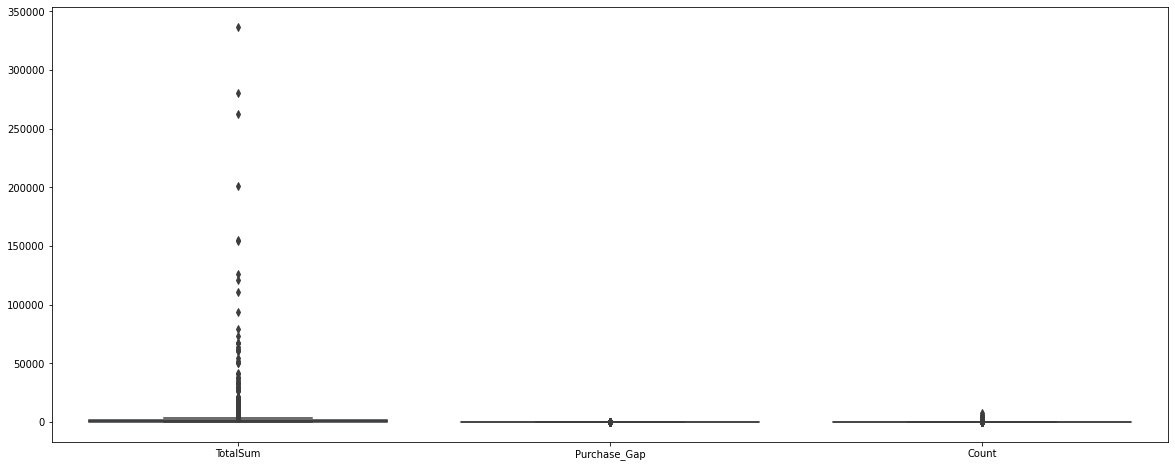

In [ ]:
# Checking for Outliners
plt.figure(figsize=(20,8))
sns.boxplot(data=new_df.iloc[:,1:4])
plt.show()

There is variability in data Lets divide them based on Quartiles

In [ ]:
def remove_outliner(df_in,col_name):
  q1=df_in[col_name].quantile(.25)
  q3=df_in[col_name].quantile(.75)
  iqr=q3-q1
  fence_low=q1-1.5*iqr
  fence_high= q3+1.5*iqr
  df_out=df_in[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
  return df_out[col_name]

In [ ]:
new_df['TotalSum']=remove_outliner(new_df,'TotalSum')
new_df['Purchase_Gap']=remove_outliner(new_df,'Purchase_Gap')
new_df['Count']=remove_outliner(new_df,'Count')

In [ ]:
new_df.dropna(inplace=True)
new_df.isnull().sum()

CustomerID      0
TotalSum        0
Purchase_Gap    0
Count           0
dtype: int64

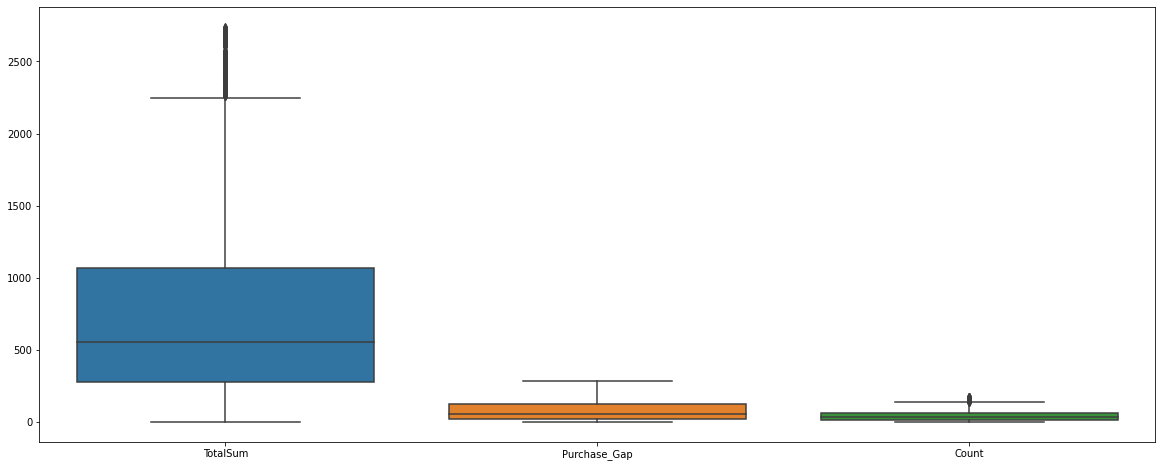

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=new_df.iloc[:,1:4])
plt.show()

In [ ]:
#assign values 
assign=new_df.iloc[:,1:4]
X=assign.values
assign.head(2)

,TotalSum,Purchase_Gap,Count
2,1797.24,74.0,31.0
3,1757.55,18.0,73.0


In [ ]:
#Rescale using Standard scaler and Normalise the data
from sklearn.preprocessing import StandardScaler, normalize
df_s=StandardScaler().fit_transform(X)
df_nor=normalize(df_s)

assign=pd.DataFrame(data =df_nor,columns=['TotalSum','Purchase_Gap','Count'])
assign.head(4)

,TotalSum,Purchase_Gap,Count
0,0.971574,-0.066658,-0.227158
1,0.827897,-0.429725,0.360448
2,-0.495688,0.708980,-0.501638
3,0.258339,0.953459,0.155488


In [ ]:

# PCA with n_components=2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_nor)
df_pca = pca.transform(df_nor)
print("Original shape:", df_nor.shape)
print("New shape :",df_pca.shape)

Original shape: (3656, 3)
New shape : (3656, 2)


In [ ]:
df.groupby(['CustomerID'])

# **Step:3 Exploratory Data Analysis**

In [ ]:
import seaborn as sns
sns.set_theme(style='darkgrid')
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,373 days 04:24:00


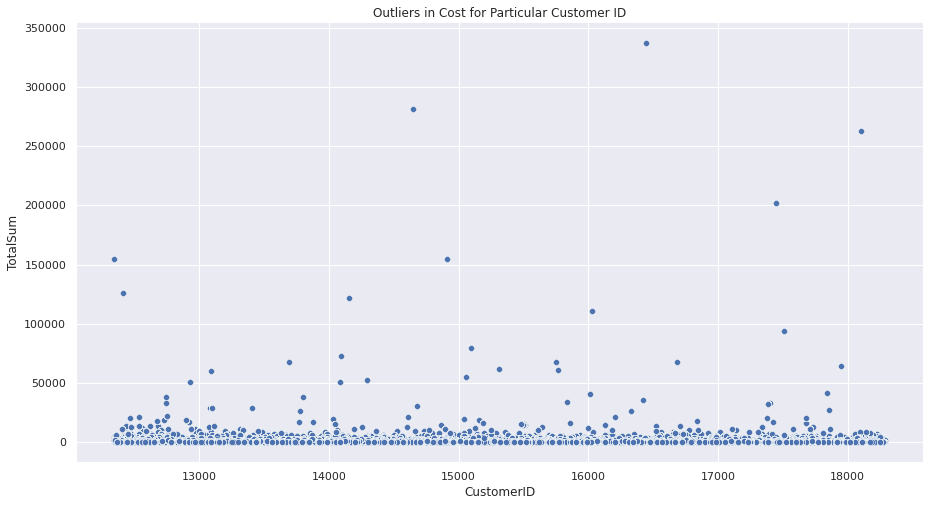

In [ ]:
#Outliers in Orignal data
g=sns.relplot(x="CustomerID", y="TotalSum",data=eda_df)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.title('Outliers in Cost for Particular Customer ID')
plt.show()

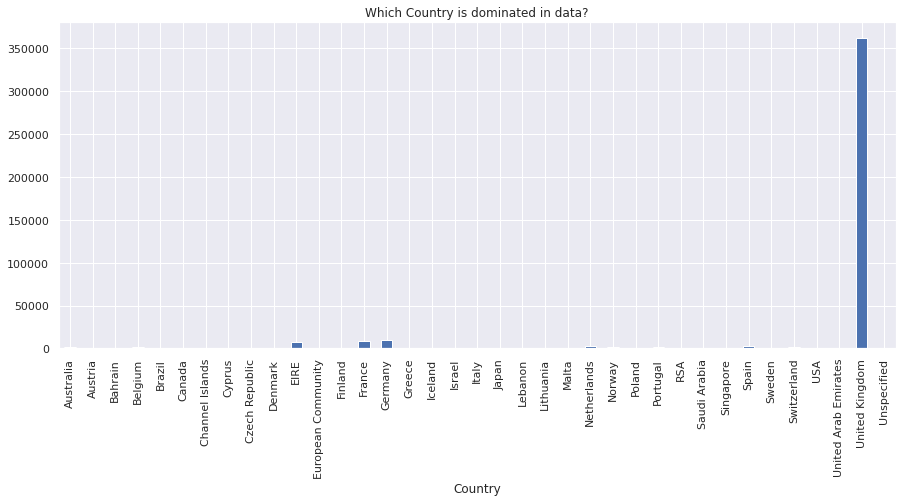

In [ ]:
df.groupby('Country').count()['CustomerID'].plot.bar(figsize=(15,6))
plt.title('Which Country is dominated in data?')
plt.show()

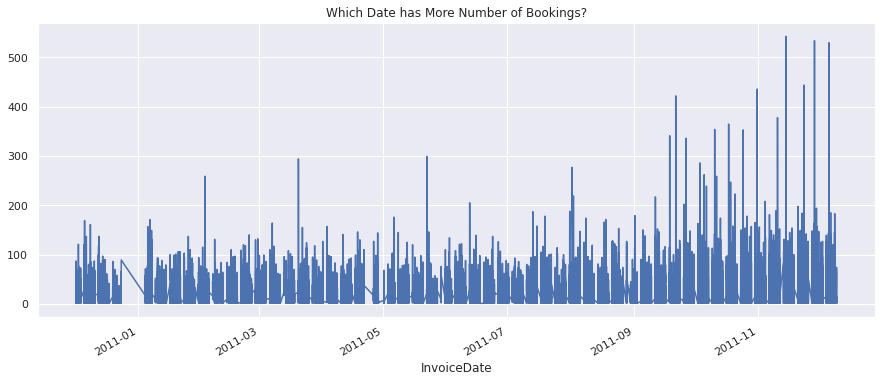

In [ ]:
eda_df.groupby('InvoiceDate').count()['InvoiceNo'].plot.line(figsize=(15,6))
plt.title('Which Date has More Number of Bookings?')
plt.show()

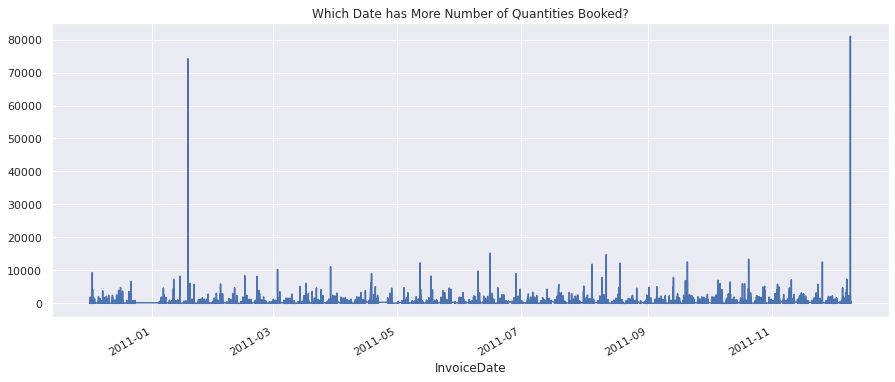

In [ ]:
eda_df.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Which Date has More Number of Quantities Booked?')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


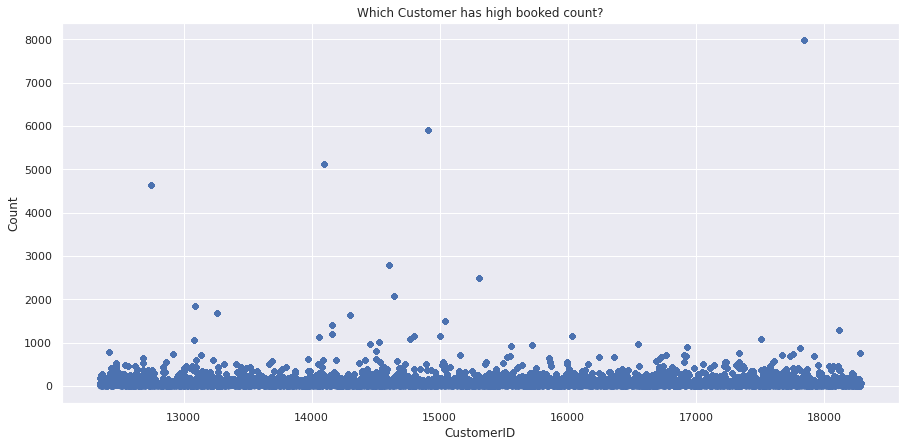

In [ ]:
eda_df.plot(x='CustomerID',y='Count',kind='scatter',figsize = (15,7))
plt.title('Which Customer has high booked count?')
plt.show()

<Figure size 3600x2160 with 0 Axes>

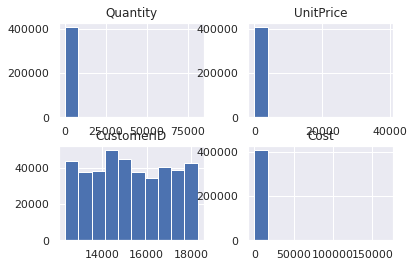

In [ ]:
plt.figure(figsize=(50,30))
df.hist()
plt.show()

### **Step:4 Finding Number of Clusters using Elbow and Silhouette Score**

In [ ]:
#Cluster Size
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
elbow=[]
ss=[]
n=range(2,9,1)
for n_cluster in n:
  kmeans=KMeans(n_clusters = n_cluster).fit(df_pca)
  elbow.append(kmeans.inertia_)
  label=kmeans.labels_

  sil_coeff=silhouette_score(df_pca,label,metric='euclidean')
  ss.append(sil_coeff)
  print('for n_clusters={}, The Silhoutte Coefficient is={}'.format(n_cluster,sil_coeff))



for n_clusters=2, The Silhoutte Coefficient is=0.49428728628278296
for n_clusters=3, The Silhoutte Coefficient is=0.6123894802353901
for n_clusters=4, The Silhoutte Coefficient is=0.561019099786192
for n_clusters=5, The Silhoutte Coefficient is=0.5154420877925352
for n_clusters=6, The Silhoutte Coefficient is=0.5153482718550463
for n_clusters=7, The Silhoutte Coefficient is=0.5013357480604806
for n_clusters=8, The Silhoutte Coefficient is=0.48501437515080126


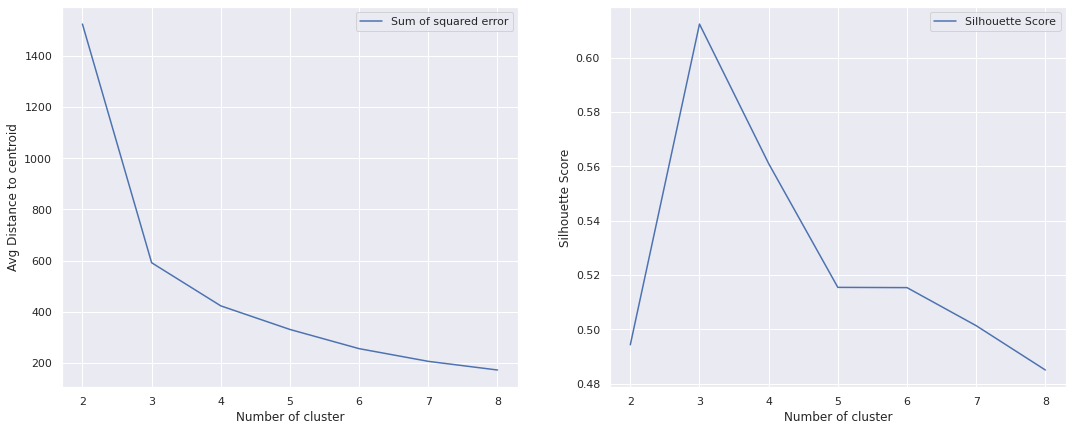

In [ ]:
fig = plt.figure(figsize=(18,7))
fig.add_subplot(121)
plt.plot(n , elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Avg Distance to centroid")
plt.legend()
fig.add_subplot(122)
plt.plot(n , ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()


# **From above graph we can see that silhouette score is high for Cluster Size=3 and Elbow Curve at 3**

In [ ]:
#CLuster=3, Parameter Tuning
kmeans=KMeans(n_clusters=3,max_iter=50)
ckmeans=kmeans.fit(X)
y_kmeans=kmeans.predict(X)
centers = kmeans.cluster_centers_
new_df['Cluster_ID']=kmeans.labels_
new_df.head(3)


,CustomerID,TotalSum,Purchase_Gap,Count,Cluster_ID
2,12348.0,1797.24,74.0,31.0,0
3,12349.0,1757.55,18.0,73.0,0
4,12350.0,334.40,309.0,17.0,1


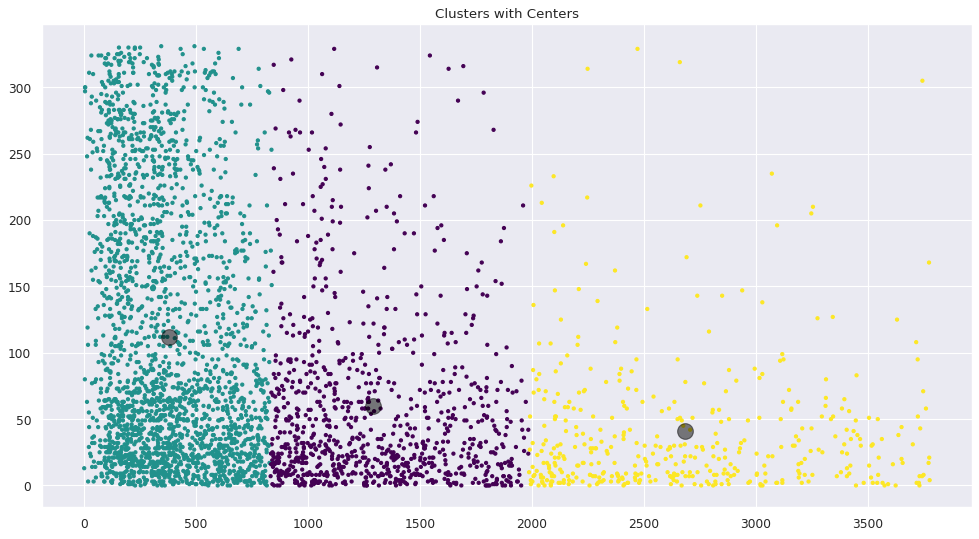

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=8, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusters with Centers')
plt.show()

In [ ]:
def plotting(y,new,z):
  plt.figure(figsize=(10,8))
  sns.boxplot(x='Cluster_ID', y=y, data=new_df)
  plt.title(z)
  return plt.show()

## Which Group is Better at Totalcost, Purchase_Gap and Count from KMeans

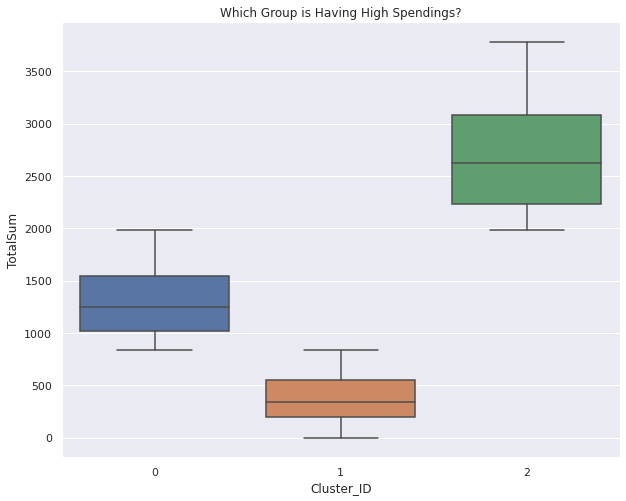

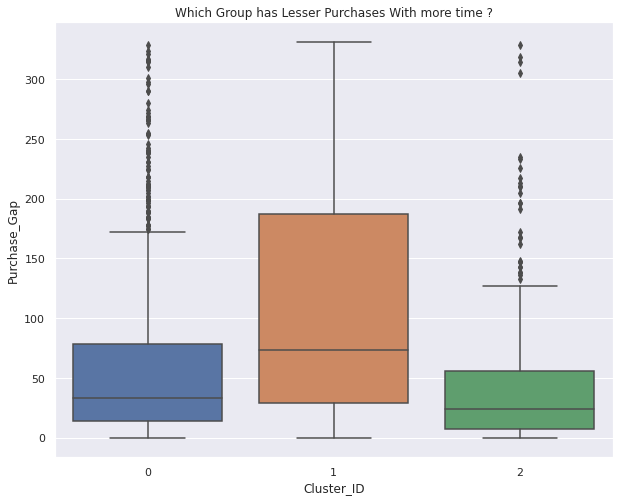

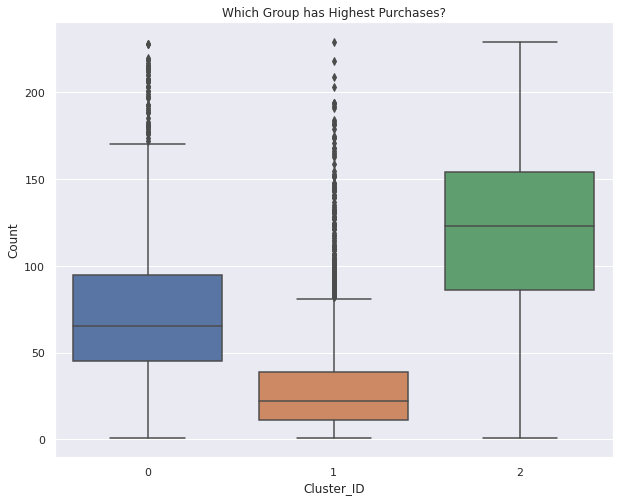

In [ ]:
z='Which Group is Having High Spendings?'
plotting('TotalSum',new_df,z)

z='Which Group has Lesser Purchases With more time ?'
plotting('Purchase_Gap',new_df,z)

z='Which Group has Highest Purchases?'
plotting('Count',new_df,z)

### **Lets Apply Herarchical Clustering**

# *Visualize Dendrogram Linkage*

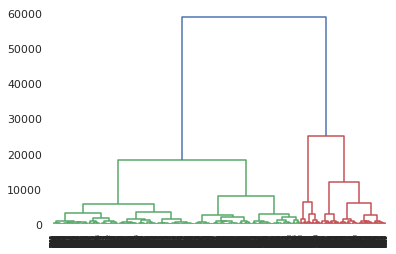

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(X, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

From Dendogram Cluster Size appears to be 3
apply Hierarchical Agglomerative Clustering with Cluster size=3.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',linkage='ward')
y_ac=ac.fit_predict(assign)

In [ ]:
new_df['Cluster_ID']=pd.DataFrame(data =y_ac,columns=['ClusterID'])

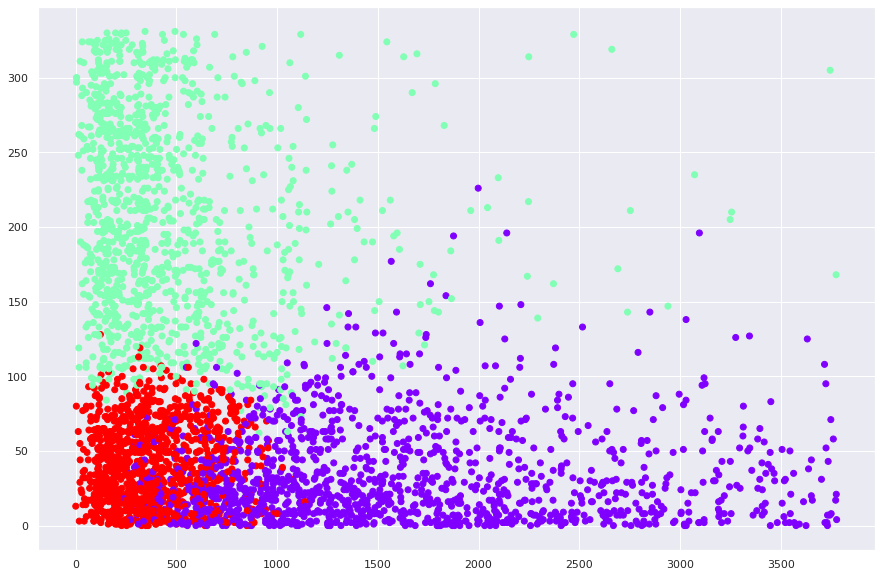

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=ac.labels_, cmap='rainbow')
plt.show()

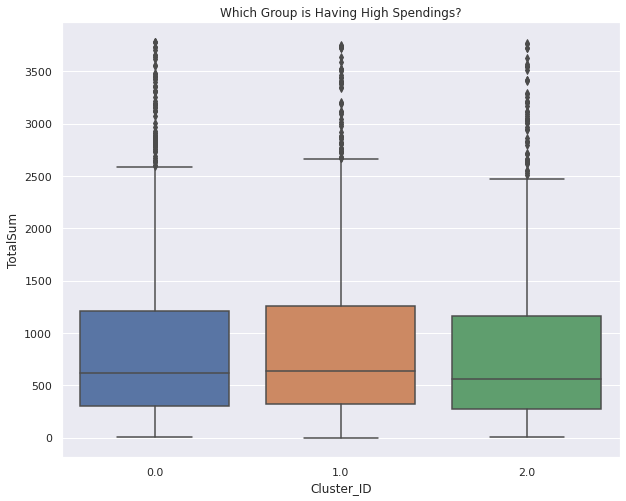

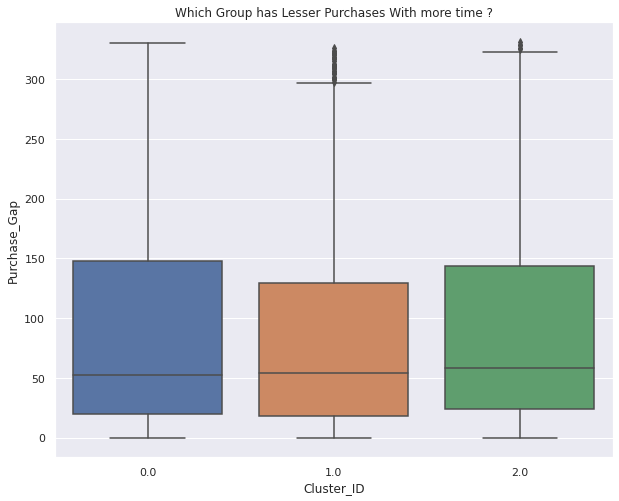

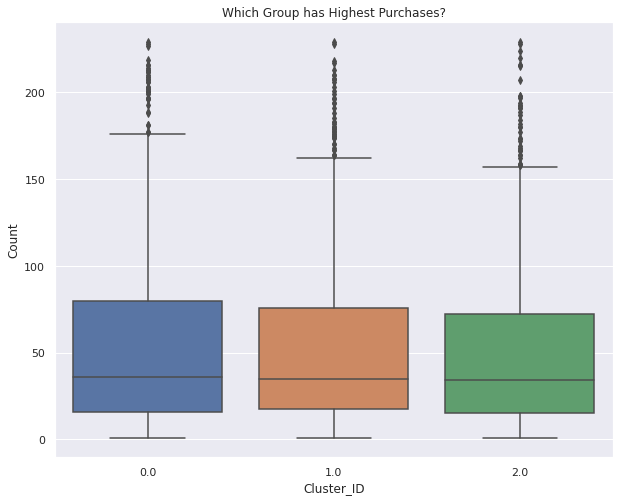

In [ ]:
z='Which Group is Having High Spendings?'
plotting('TotalSum',new_df,z)

z='Which Group has Lesser Purchases With more time ?'
plotting('Purchase_Gap',new_df,z)

z='Which Group has Highest Purchases?'
plotting('Count',new_df,z)

# **Summary**
* First imported the libraries and dataset which was in excel file and This dataset contains 541909 rows and 8 columns, then checked for duplication of data and null values.
*	There were more than 120000 null values present in CustomerID Column it main column as other column was filled with zero and drop all values.
*	We Coverted data into HighSpending, Late Purchases ID, Number of Order till date.
* Various plots are visualized to see Outliers and Applied Inter Quartile Range method.
*	Data was used different units so its scaled using Standard Scaler and normalise data.
*	Applied Principle Component Analysis and reduced to 2-dim
*	To find Number Clusters we applied Elow Method and silhouette score the Selected Cluster Size=3 with Visulized Graph.
* K-Means Clustering was applied with clustersize=3.
* Dendrogram Linkage and Herarchical Agglomerative Clustering Models are applied
* Detailed visualization of each Cluster Center and their Spendings, Delay, Frequency of Number of Orders.

# **Challenges**


*   Whole data Consists of duplicated data initally there was more than 5lakh data after grouped Based Customer ID it was left with 3.5 thousand Customers left. 
*   Groupping them based on certain assumptions and there was many negative values.

## **Conclusion**

*   Given Data for Customer Segmentation most of them are irrelevant like StockCode, Description.etc and there is no relation.
*   After Applying Elbow and Silhouette score are more at cluster size =3, score was than 0.6, 
*   Same results applied with Dendrogram results of Kmeans Clusters Centers in plots appears better than Herarchical Agglomerative Clustering

*   Cluster_0 CustomerID's take more time gap between Each Oder they Placed(Rarely).
*   Cluster_1 CustomerID's Makes always a Bulk Purchases which leads high Spendings(Retailers). 
*   Cluster_2 CustomerID's Has Highest Orders Placed(Small Shopes with less inventory).